In [1]:
# I got an error on my system when I try to train this neural net
# `Error #15: Initializing libiomp5.dylib, but found libomp.dylib already initialized`
# Solution: https://stackoverflow.com/questions/53014306/error-15-initializing-libiomp5-dylib-but-found-libiomp5-dylib-already-initial
import os

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [3]:
datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             fill_mode='nearest')

train_it = datagen.flow_from_directory('../data/weather/train/',
                                       target_size=(128, 128),
                                       color_mode='rgb',
                                       class_mode='categorical',
                                       batch_size=16)
valid_it = datagen.flow_from_directory('../data/weather/validation/',
                                       target_size=(128, 128),
                                       color_mode='rgb',
                                       class_mode='categorical',
                                       batch_size=16)

Found 540 images belonging to 4 classes.
Found 585 images belonging to 4 classes.


In [4]:
model = keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(4))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        1

In [5]:
model.compile(optimizer='adam',
              loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_it,
                    steps_per_epoch=len(train_it),
                    validation_data=valid_it,
                    validation_steps=len(valid_it),
                    epochs=50,
                    callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/50
34/34 [==============================] - 14s 426ms/step - loss: 4.0136 - accuracy: 0.4500 - val_loss: 0.8083 - val_accuracy: 0.6479
Epoch 2/50
34/34 [==============================] - 15s 427ms/step - loss: 0.8953 - accuracy: 0.6093 - val_loss: 0.8609 - val_accuracy: 0.6427
Epoch 3/50
34/34 [==============================] - 15s 444ms/step - loss: 0.9239 - accuracy: 0.5870 - val_loss: 0.8887 - val_accuracy: 0.7419
Epoch 4/50
34/34 [==============================] - 16s 470ms/step - loss: 0.8117 - accuracy: 0.6759 - val_loss: 4.9008 - val_accuracy: 0.5111
Epoch 5/50
34/34 [==============================] - 14s 424ms/step - loss: 1.3808 - accuracy: 0.4685 - val_loss: 1.3683 - val_accuracy: 0.6308
Epoch 6/50
34/34 [==============================] - 14s 418ms/step - loss: 1.0569 - accuracy: 0.4537 - val_loss: 1.0543 - val_accuracy: 0.6222
Epoch 7/50
34/34 [==============================] - 14s 420ms/step - loss: 0.9544 - accuracy: 0.5037 - val_loss: 1.0127 - val_accuracy: 0.5248

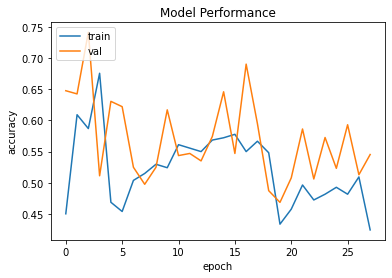

In [6]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Performance')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()